<a href="https://colab.research.google.com/github/cpython-projects/da_1709/blob/main/lesson_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from google.colab import files
filterwarnings('ignore')

# Кореляція в аналітиці: Pearson, Spearman, Kendall

## 1. Що таке кореляція

### Інтуїтивне визначення

Кореляція — це міра того, **наскільки дві змінні змінюються разом**.

Не:

> “X викликає Y”

А:

> “Коли X зростає, що зазвичай відбувається з Y?”

---

### Приклади

* Чим більша реклама → тим більші продажі?
* Чим більше досвіду → тим вища зарплата?
* Чим більша площа → тим дорожче житло?

---

### Діапазон

Кореляція ∈ [-1, 1]

| Значення | Інтерпретація                |
| -------- | ---------------------------- |
| -1       | ідеальний негативний         |
| 0        | зв’язку немає                |
| 0.00 – 0.10          | Практично немає зв’язку        |
| 0.10 – 0.30          | Дуже слабкий                   |
| 0.30 – 0.50          | Слабкий / помірний             |
| 0.50 – 0.70          | Помірний / сильний             |
| 0.70 – 0.90          | Сильний                        |
| 0.90 – 1.00          | Дуже сильний / майже ідеальний |

**Знак кореляції — це теж бізнес-інформація:**
* позитивна (r > 0): чим більше X → тим більше Y  
  приклад: площа → ціна
* негативна (r < 0): чим більше X → тим менше Y  
  приклад: вік будинку → ціна

## 2. Типи кореляції

### Шкали вимірювання

Перед тим як рахувати кореляцію, аналітик має спитати:

> *На якій шкалі виміряні дані?*

| Шкала    | Що це означає      | Приклад       |
| -------- | ------------------ | ------------- |
| Nominal  | просто категорії   | країна, стать |
| Ordinal  | є порядок          | рейтинг 1–5   |
| Interval | різниці мають сенс | температура   |
| Ratio    | є нуль             | ціна, площа   |

> Якщо можна сказати **«у 2 рази більше» — це Ratio.**
> Якщо тільки **«на 10 більше» — це Interval.**

І далі:

| Тип даних       | Яка кореляція          |
| --------------- | ---------------------- |
| Ratio–Ratio     | Pearson / Spearman     |
| Ordinal–Ordinal | Spearman / Kendall     |
| Ordinal–Ratio   | Spearman               |
| Nominal         | кореляція не підходить |

### Методи

| Метод           | Вимірює                      | Відповідь                                                    |                        |
| --------------- | ---------------------------- | ------------------------------------------------------------ | ---------------------- |
| **Pearson**     | лінійну залежність           | *Наскільки побудована пряма описує зв’язок*                  |                        |
| **Spearman**    | рангову монотонну залежність | *Чи змінюється Y разом із X у одному напрямку, неважливо як* |                        |
| **Kendall Tau** | рангову/порядкову залежність | *Наскільки порядки збігаються (частка узгоджених пар)*       | ([miniwebtool.com][1]) |

Це **не ті самі коефіцієнти**, вони відповідають на **різні питання**.

### Pearson — лінійна залежність

Pearson відповідає на питання:

> **Чи можна описати зв’язок між X і Y майже прямою лінією?**

* Позитивний r → X↑ → Y↑
* Негативний r → X↑ → Y↓
* r близько 0 → прямої залежності майже немає


#### Умови, коли допустимо використовувати:

* Обидві змінні **кількісні (interval/ratio)**
* Зовнішній вигляд графіку **наближено лінійний**
* Немає сильних викидів, або їх мало
* Мета — **лінійний тренд** (Y ~ a·X + b)

### Spearman — монотонна залежність

Spearman відповідає на питання:

> **Чи змінюється Y разом із X в одному напрямку, навіть якщо не по прямій?**

* Позитивний ρ → X↑ → Y↑ (монотонно)
* Негативний ρ → X↑ → Y↓
* ρ близько 0 → монотонної залежності майже немає

---

#### Умови, коли допустимо використовувати:

* Обидві змінні **кількісні (interval/ratio)** або **рангові (ordinal)**
* Залежність може бути **нелінійною, але монотонною**
* Є **викиди**, які можуть спотворювати Pearson
* Мета — оцінити **монотонний тренд**, а не лінійність

### Kendall Tau — порядок/ранги

Kendall відповідає на питання:

> **Наскільки збігаються порядки між X і Y?**

* Позитивний τ → більші X співпадають із більшими Y
* Негативний τ → більші X співпадають із меншими Y
* τ близько 0 → порядок майже не збігається

---

Kendall дивиться на **всі пари об'єктів** і для кожної пари (i, j) перевіряє:
* якщо
  $X_i > X_j$ **і** $Y_i > Y_j$ → *узгоджена пара*
* якщо
  $X_i > X_j$, але $Y_i < Y_j$ → *неузгоджена*  

Ідея:
> Чи зберігається відносний порядок між тими ж самими двома об’єктами?

---

#### Умови, коли допустимо використовувати:

* Дані **рангові (ordinal)** або **кількісні**, де важливий порядок, а не точна величина
* **Мала вибірка**
* Є багато однакових значень (ties)
* Мета — оцінити **узгодженість порядків**, а не силу лінійного тренду

### Практичний алгоритм вибору

#### 1) Подивись на шкалу

* **Ratio/Interval** → Pearson або Spearman
* **Ordinal** → Spearman або Kendall

---

#### 2) Подивись на графік

* Якщо точки *виглядають по прямій → Pearson*
* Якщо тренд *монотонний, але не пряма → Spearman*
* Якщо багато однакових або порядки важливі → Kendall

---

#### 3) Подивись на розподіл

* Сильно *не нормальний, важкі хвости,* або *викиди* → Spearman / Kendall
* Нормальний/виражений лінійний тренд → Pearson

## Два способи розрахунку кореляції в Python

У Python кореляцію можна рахувати **двома основними способами**:

1. Через **Pandas** (`df.corr()`)
2. Через **scipy.stats** (`pearsonr`, `spearmanr`, `kendalltau`)

---

### Через Pandas — `df.corr()`

* Повертає **таблицю кореляцій** між усіма вибраними змінними
* Підтримує методи: `"pearson"`, `"spearman"`, `"kendall"`
* **Плюс:** швидко для кількох змінних, готовий DataFrame
* **Мінус:** не повертає **p-value** (статистичну значущість)

---

### Через scipy.stats — точкові обчислення

* Повертає **коефіцієнт кореляції** і **p-value**
* Можна вибрати потрібний метод (`pearsonr`, `spearmanr`, `kendalltau`)
* **Плюс:** отримуємо статистичну значущість
* **Мінус:** треба робити для **пар змінних окремо**, не таблицею

---

### Що таке p-value у кореляції

* **p-value** показує, наскільки отримане значення кореляції могло виникнути **випадково**, якщо насправді **зв’язку немає**
* Інтерпретація:

| p-value | Інтерпретація                                                           |
| ------- | ----------------------------------------------------------------------- |
| < 0.05  | кореляція статистично значуща (висока ймовірність, що зв’язок реальний) |
| ≥ 0.05  | кореляція **не є статистично значущою** (може бути випадковою)          |

> Важливо: **велике r ≠ завжди значуща кореляція**. Якщо вибірка маленька, r може бути великим випадково.

---

### Практична порада

* **Якщо треба швидко оцінити матрицю кореляцій** → `df.corr()`
* **Якщо потрібна статистична значущість** → `scipy.stats`

## Приклади

In [55]:
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [56]:
df = pd.read_csv('kc_house_data.csv')

In [57]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [59]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [60]:
df['was_renovated'] = df['yr_renovated'] > 0

In [61]:
columns_for_drop = ['id', 'date', 'zipcode', 'lat', 'long', 'yr_renovated']
df.drop(columns_for_drop, axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  year           21613 non-null  int32  
 16  was_renovated  21613 non-null  bool   
dtypes: bool(1), float64(3), int32(1), int64(12)
memory

| Колонка      | Реально що це  |
| ------------ | -------------- |
| `waterfront` | бінарна (0/1)  |
| `view`       | ordinal (0–4)  |
| `condition`  | ordinal (1–5)  |
| `grade`      | ordinal (1–13) |

In [64]:
ordinal_cols = ['view', 'condition', 'grade', 'waterfront']

for col in ordinal_cols:
    print(col)
    print(df[col].unique())
    print('-' * 20)

view
[0 3 4 2 1]
--------------------
condition
[3 5 4 1 2]
--------------------
grade
[ 7  6  8 11  9  5 10 12  4  3 13  1]
--------------------
waterfront
[0 1]
--------------------


In [65]:
df['waterfront'] = df['waterfront'].astype('bool')

In [66]:
df['view'] = df['view'].astype('category').cat.set_categories([0, 1, 2, 3, 4])
df['condition'] = df['condition'].astype('category').cat.set_categories([1, 2, 3, 4, 5])
df['grade'] = df['grade'].astype('category').cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  int64   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  int64   
 4   sqft_lot       21613 non-null  int64   
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  bool    
 7   view           21613 non-null  category
 8   condition      21613 non-null  category
 9   grade          21613 non-null  category
 10  sqft_above     21613 non-null  int64   
 11  sqft_basement  21613 non-null  int64   
 12  yr_built       21613 non-null  int64   
 13  sqft_living15  21613 non-null  int64   
 14  sqft_lot15     21613 non-null  int64   
 15  year           21613 non-null  int32   
 16  was_renovated  21613 non-null  bool    
dtypes: bool(2), category(3), float6

In [68]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,year,was_renovated
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.585379,0.082447,0.003576,0.126092
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.391638,0.029244,-0.009838,0.018553
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.568634,0.087175,-0.026596,0.050260
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.756420,0.183286,-0.029038,0.055094
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.144608,0.718557,0.005468,0.007745
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.279885,-0.011269,-0.022315,0.006260
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.086463,0.030703,-0.004165,0.093294
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.280439,0.072575,0.001364,0.104062
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.092824,-0.003406,-0.045589,-0.060139
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.713202,0.119248,-0.030387,0.014008


**«Чи зростає ціна будинку зі збільшенням житлової площі?»**

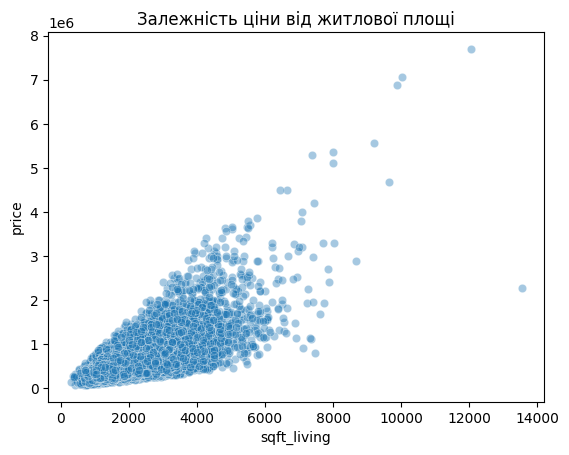

In [69]:
sns.scatterplot(
    data=df,
    x='sqft_living',
    y='price',
    alpha=0.4
)

plt.title('Залежність ціни від житлової площі')
plt.show()


In [70]:
# price — кількісна
# sqft_living — кількісна

df[['price', 'sqft_living']].corr(method='pearson')

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [71]:
df[['price', 'sqft_living']].corr(method='spearman')

,price,sqft_living
price,1.000000,0.644191
sqft_living,0.644191,1.000000


Площа — важливий фактор, але недостатній сам по собі.  
Для точних прогнозів потрібно враховувати якість будинку, локацію, рік побудови та інші характеристики.

In [74]:
import scipy.stats as stats

stat, p = stats.pearsonr(df['price'], df['sqft_living'])
print("Pearson stat=%.5f, p=%.5f" % (stat, p))

Pearson stat=0.70204, p=0.00000


**«Чи дорожчі будинки з більшою кількістю поверхів?»**

In [72]:
# floors — дискретна змінна
df[['price', 'floors']].corr(method='spearman')

,price,floors
price,1.000000,0.322347
floors,0.322347,1.000000


Поверховість впливає на ціну, але не визначає її.

**«Що сильніше впливає на ціну: рік побудови чи якість будинку?»**

In [73]:
# grade — порядкова шкала (ordinal)
# yr_built — кількісна

df[['price', 'grade', 'yr_built']].corr(method='spearman')


,price,grade,yr_built
price,1.000000,0.658215,0.102038
grade,0.658215,1.000000,0.500633
yr_built,0.102038,0.500633,1.000000


Ціну формує не вік будинку, а його якість.  
Рік побудови важливий лише настільки, наскільки він пов’язаний із якістю.  

**«Чи впливає на ціну якість будинку?»**

In [25]:
df[['grade', 'price']].corr(method='kendall')

,grade,price
grade,1.000000,0.527834
price,0.527834,1.000000


Ціну формує якість будинку.  

# Інструменти перевірки нормальності

Нормальний розподіл — це симетрична “дзвіноподібна” крива:

* Має середнє μ і стандартне відхилення σ
* 68% даних лежать в межах ±1σ від μ
* 95% — в межах ±2σ від μ

Часто ми **припускаємо нормальність** при багатьох статистичних моделях, але **якщо дані не нормальні**, результати моделей можуть бути некоректними.

## Чому важливо перевіряти нормальність?

Коли ми працюємо з аналітичними метриками — наприклад, **середнє, медіана, стандартне відхилення**, ми часто інтуїтивно припускаємо, що дані «близькі до нормальних».

**Що це дає на практиці:**

* Якщо розподіл симетричний і нормальний — **середнє і медіана будуть близькими**.
* Якщо розподіл сильно «зсунутий» (асиметричний, наприклад, ціни на будинки) — **середнє може вводити в оману**, а медіана буде більш стабільною.
* Стандартне відхилення показує **розкид даних навколо середнього**, але якщо дані не нормальні, варто бути обережним з інтерпретацією.

Тобто **перевірка нормальності допомагає нам зрозуміти, наскільки середнє і σ адекватно описують дані**.

## Інструменти перевірки нормальності з `scipy.stats`

У пакеті `scipy.stats` є кілька популярних тестів:

| Тест                 | Що перевіряє | Переваги                           |
| -------------------- | ------------ | ---------------------------------- |
| **Shapiro‑Wilk**     | Нормальність | Чутливий, добре працює для малої N |
| **D’Agostino’s K²**  | Нормальність | Перевіряє асиметрію + ексцес       |

### Тест Shapiro‑Wilk

Перевіряє нульову гіпотезу:
**H0: дані нормальні**

<Axes: >

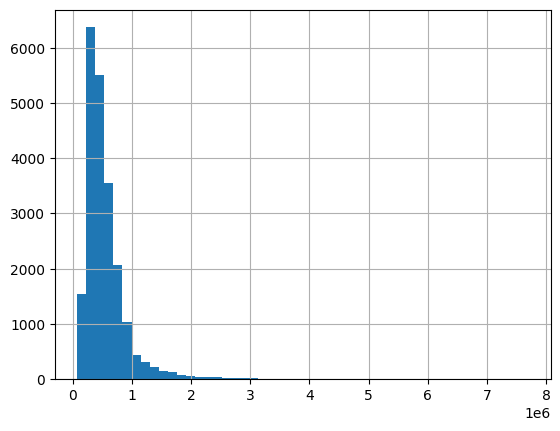

In [75]:
df.price.hist(bins=50)

In [76]:
from scipy import stats

stat, p = stats.shapiro(df["price"])
print("Shapiro‑Wilk stat=%.5f, p=%.5f" % (stat, p))

Shapiro‑Wilk stat=0.71201, p=0.00000


#### `stat` — статистика тесту Шапіро–Уїлка (W)

* Зазвичай позначається як **W**
* Показує, **наскільки форма розподілу близька до нормальної**
* Діапазон значень:

  ```
  0 < W ≤ 1
  ```

* **W ≈ 1** → розподіл близький до нормального
* **W значно менше 1** → суттєве відхилення від нормальності

Важливо:
Статистику **W майже ніколи не інтерпретують окремо** — вона використовується для обчислення p-value.

---

#### `p` — p-value тесту Шапіро–Уїлка

Це **головний результат тесту**.

##### Нульова гіпотеза (H₀):

> Дані походять з **нормального розподілу**


* **p ≥ 0.05** → немає підстав відхиляти H₀  
  розподіл **можна вважати нормальним**
* **p < 0.05** → відхиляємо H₀  
  розподіл **не є нормальним**

#### Важливе застереження

* Тест Шапіро–Уїлка **не рекомендується для вибірок понад 5000 спостережень**
* Для великих датасетів краще використовувати:

  * **D’Agostino’s K²**

In [29]:
df.shape

(21613, 17)

### Тест D’Agostino’s K²

Перевіряє **асиметрію та ексцес**:

In [77]:
stat, p = stats.normaltest(df["price"])
print("D’Agostino’s K² stat=%.5f, p=%.5f" % (stat, p))

D’Agostino’s K² stat=19121.78894, p=0.00000


#### `stat` — статистика D’Agostino’s K²

* Позначається як **K²**
* Це **комбінована статистика**, яка враховує:

  * **асиметрію (skewness)**
  * **ексцес (kurtosis)**

* **Мале значення K²** → розподіл близький до нормального
* **Велике значення K²** → сильне відхилення від нормальності

Саму величину `stat` зазвичай **не інтерпретують напряму** — вона використовується для обчислення p-value.

---

#### `p` — p-value тесту

Це **ключовий результат тесту**.

#### Нульова гіпотеза (H₀):

> Дані походять з **нормального розподілу**

* **p ≥ 0.05** → немає підстав відхиляти H₀  
  розподіл **можна вважати нормальним**
* **p < 0.05** → відхиляємо H₀  
  розподіл **не є нормальним**

## Що робити, якщо дані *не нормальні*? Трансформація

<Axes: >

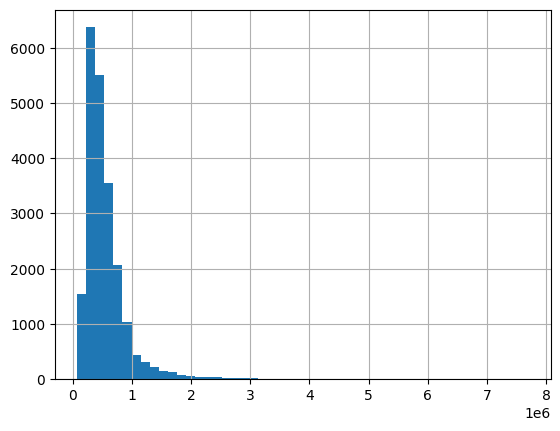

In [32]:
df.price.hist(bins=50)

<Axes: >

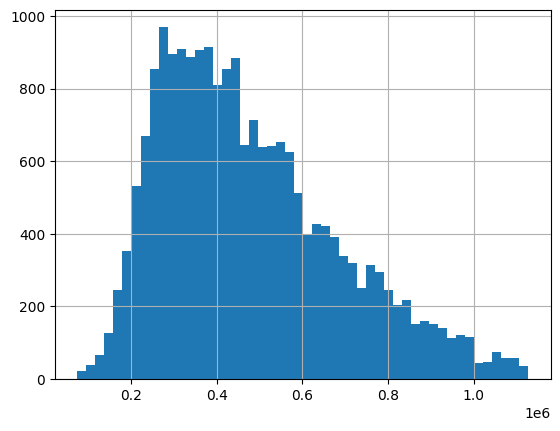

In [78]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_new = df[(df.price >= lower) & (df.price <= upper)]
df_new.price.hist(bins=50)

In [79]:
stat, p = stats.normaltest(df_new["price"])
print("D’Agostino’s K² stat=%.5f, p=%.5f" % (stat, p))

D’Agostino’s K² stat=1540.67823, p=0.00000


In [80]:
df = df[(df.price >= df.price.quantile(0.01)) & (df.price <= df.price.quantile(0.99))]

<Axes: >

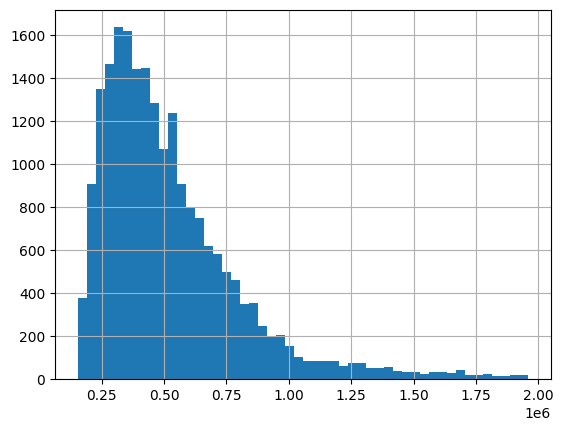

In [81]:
df.price.hist(bins=50)


### Логарифм

In [82]:
df["log_price"] = np.log1p(df["price"])

<Axes: >

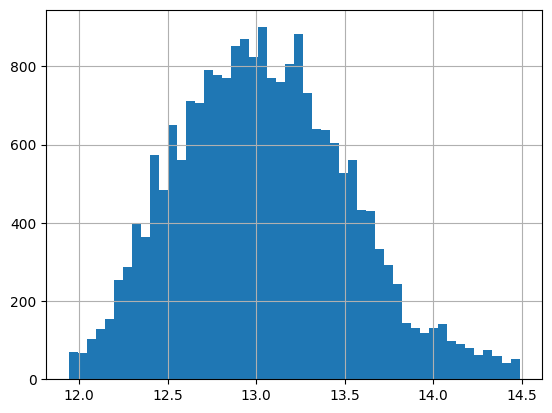

In [83]:
df.log_price.hist(bins=50)

In [84]:
stat, p = stats.normaltest(df["log_price"])
print("D’Agostino’s K² stat=%.5f, p=%.5f" % (stat, p))

D’Agostino’s K² stat=355.79693, p=0.00000


### Квадратний корінь:

In [48]:
df["sqrt_price"] = np.sqrt(df["price"])

In [49]:
stat, p = stats.normaltest(df["sqrt_price"])
print("D’Agostino’s K² stat=%.5f, p=%.5f" % (stat, p))

D’Agostino’s K² stat=2880.22133, p=0.00000


### QQ-plot

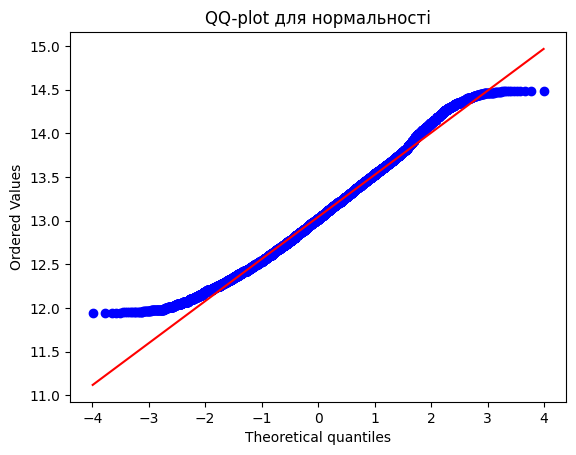

In [50]:
stats.probplot(df.log_price, dist="norm", plot=plt)
plt.title('QQ-plot для нормальності')
plt.show()


# Довірчі інтервали (Confidence Intervals)

In [85]:
df.price.mean()

np.float64(522108.06482836773)

## Що таке довірчий інтервал?

Довірчий інтервал — це **діапазон значень**, який з певним рівнем впевненості (наприклад, 95%) **містить істинне середнє** генеральної сукупності.

Простими словами:

* Якщо ми обчислюємо середню ціну будинків по вибірці, ми не знаємо точне середнє всіх будинків.
* ДІ дає нам **інтервал**, де це середнє з великою ймовірністю знаходиться.

**Приклад:**

* Середня ціна будинку = 700 000, 95% ДІ = (680 000, 720 000)  
* Ми можемо сказати: «Істинне середнє серед всіх будинків, ймовірно, знаходиться між 680 000 та 720 000»

---

## Чому важливо для аналітика?

* ДІ дозволяє **оцінити точність метрики** (середнє, відсотки, LTV і т.д.)
* Може допомогти **порівнювати сегменти** (наприклад, райони чи категорії будинків)
* Використовується для **звітності та обґрунтування рішень**

---

## Формула для довірчого інтервалу середнього

Якщо у нас вибірка `x1, x2, …, xn` з середнім `x̄` і стандартним відхиленням `s`, ДІ обчислюється як:

$$
CI = x̄ \pm z \cdot \frac{s}{\sqrt{n}}
$$

* `z` — критичне значення для рівня довіри (для 95% → 1.96)
* `s` — стандартне відхилення вибірки
* `n` — розмір вибірки


Якщо дані сильно не нормальні, можна попередньо застосувати **логарифм**, а потім обчислити ДІ на log-значеннях.

## Приклад

<Axes: >

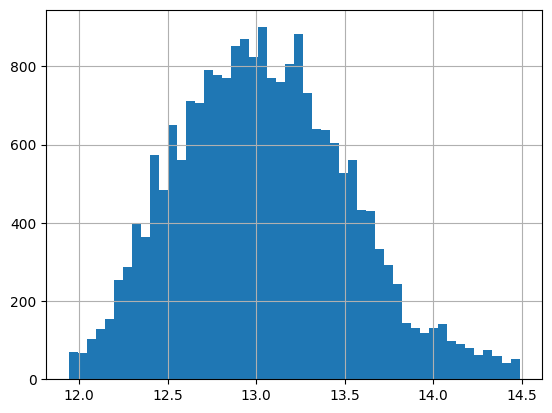

In [86]:
df.log_price.hist(bins=50)

In [87]:
prices = df["log_price"]

# Середнє і стандартне відхилення
mean_price = prices.mean()
std_price = prices.std()
n = len(prices)

print(f"Середнє: {mean_price:.0f}, std: {std_price:.0f}, n: {n}")

Середнє: 13, std: 0, n: 21179


In [88]:
z = stats.norm.ppf(0.975)

ci_lower_log = mean_price - z * std_price / (n ** 0.5)
ci_upper_log = mean_price + z * std_price / (n ** 0.5)

print(ci_lower_log, ci_upper_log)

13.036894159400791 13.049929264489425


In [89]:
ci_lower = np.exp(ci_lower_log)
ci_upper = np.exp(ci_upper_log)

print(f"95% CI для цін: {ci_lower:.0f} – {ci_upper:.0f}")


95% CI для цін: 459041 – 465064


In [90]:
df.price.mean()

np.float64(522108.06482836773)